In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy.linalg import block_diag

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.serif": ["Verdana"],
    "mathtext.fontset": "cm",
    "font.size": 14,             # Base font size
    "axes.titlesize": 16,        # Title font size
    "axes.labelsize": 14,        # Axis label size
    "xtick.labelsize": 12,       # X tick label size
    "ytick.labelsize": 12,       # Y tick label size
})

In [3]:
#Geometry
L1 = 1310.0 #Length of upstream bridge [m]
L2 = 1310.0 #Length of downstream bridge [m]

B = 18.3 #Width of bridge [m]
D = 3.33 #Height of bridge [m]

N = 1 #N*D = distance between bridges [m]
d = D*N #Distance between bridges [m]

In [4]:
#Wind parameters
rho = 1.25 #Density of air [kg/m^3]
V = 37.6 #10-minute mean wind velocity [m/s]
xL_u = 360 #Longitudinal turbulence length scale [m]
ctt = 1.2 #Turbulence factor
z = 50.0 #Location of the bridge above terrain [m]
z0 = 0.01 #Roughness length [m]
I_u = ctt / np.log(z/z0) #Longitudinal turbulence intensity
I_w = 0.5 * I_u #Vertical turbulence intensity
sigma_u = I_u * V #Longitudinal turbulence standard deviation
sigma_w = I_w * V #Vertical turbulence standard deviation

In [5]:
#Frequency
omega = np.linspace(0.001,3,1000) #Fine frequency axis [Rad/s]
omega_load = np.logspace(-3,1,100) #Crude frequency axis [Rad/s]

In [6]:
#Power spectra
a_u = 6.8 #Longitudinal turbulence spectrum coefficient
a_w = 0.55 #Vertical turbulence spectrum coefficient
f_hat = (omega_load/(2*np.pi)) * xL_u / V #Non-dimensional frequency
S_u = sigma_u**2 / (omega_load/(2*np.pi)) * a_u * f_hat / (1 + 1.5 *a_u * f_hat)**(5/3) #Longitudinal turbulence spectrum
S_w = sigma_w**2 / (omega_load/(2*np.pi)) * a_w * f_hat / (1 + 1.5 *a_w * f_hat)**(5/3) #Vertical turbulence spectrum

In [7]:
#Power co-spectra
b_u = 1.0 #Longitudinal turbulence co-spectrum coefficient
b_w = 0.5 #Vertical turbulence co-spectrum coefficient
c_u = 1.5 #Longitudinal turbulence co-spectrum coefficient
c_w = 1.0 #Vertical turbulence co-spectrum coefficient

kappa_u = b_u * np.sqrt((omega_load/V)**2 + (1/(c_u*xL_u))**2)
kappa_w = b_w * np.sqrt((omega_load/V)**2 + (1/(c_w*xL_u))**2) #Non-dimensional frequency

In [8]:
#Static coefficients
names = [
    # CD
    'CD_Upwind_1D', 'CD_Downwind_1D',
    'CD_Upwind_2D', 'CD_Downwind_2D',
    'CD_Upwind_3D', 'CD_Downwind_3D',
    'CD_Upwind_4D', 'CD_Downwind_4D',
    'CD_Upwind_5D', 'CD_Downwind_5D',
    'CD_Single',
    
    # CM
    'CM_Upwind_1D', 'CM_Downwind_1D',
    'CM_Upwind_2D', 'CM_Downwind_2D',
    'CM_Upwind_3D', 'CM_Downwind_3D',
    'CM_Upwind_4D', 'CM_Downwind_4D',
    'CM_Upwind_5D', 'CM_Downwind_5D',
    'CM_Single',
    
    # CL
    'CL_Upwind_1D', 'CL_Downwind_1D',
    'CL_Upwind_2D', 'CL_Downwind_2D',
    'CL_Upwind_3D', 'CL_Downwind_3D',
    'CL_Upwind_4D', 'CL_Downwind_4D',
    'CL_Upwind_5D', 'CL_Downwind_5D',
    'CL_Single'
]

save_dir = 'Static_coeff_for_buffeting'

for name in names:
    file_path = os.path.join(save_dir, name + '.npy')
    
    if os.path.exists(file_path):
        data = np.load(file_path)
        globals()[name] = data

In [9]:
Bq_1D = (rho * V * B / 2) * np.array([
    [2*CL_Upwind_1D[0], CL_Upwind_1D[1] + CL_Upwind_1D[2] + (D/B)*CD_Upwind_1D[0]],
    [2*B*CM_Upwind_1D[0], B*CM_Upwind_1D[1] + B*CM_Upwind_1D[2]],
    [2*CL_Downwind_1D[0], CL_Downwind_1D[1] + CL_Downwind_1D[2] + (D/B)*CD_Downwind_1D[0]],
    [2*B*CM_Downwind_1D[0], B*CM_Downwind_1D[1] + B*CM_Downwind_1D[2]]
])

Bq_2D = (rho * V * B / 2) * np.array([
    [2*CL_Upwind_2D[0], CL_Upwind_2D[1] + CL_Upwind_2D[2] + (D/B)*CD_Upwind_2D[0]],
    [2*B*CM_Upwind_2D[0], B*CM_Upwind_2D[1] + B*CM_Upwind_2D[2]],
    [2*CL_Downwind_2D[0], CL_Downwind_2D[1] + CL_Downwind_2D[2] + (D/B)*CD_Downwind_2D[0]],
    [2*B*CM_Downwind_2D[0], B*CM_Downwind_2D[1] + B*CM_Downwind_2D[2]]
])

Bq_3D = (rho * V * B / 2) * np.array([
    [2*CL_Upwind_3D[0], CL_Upwind_3D[1] + CL_Upwind_3D[2] + (D/B)*CD_Upwind_3D[0]],
    [2*B*CM_Upwind_3D[0], B*CM_Upwind_3D[1] + B*CM_Upwind_3D[2]],
    [2*CL_Downwind_3D[0], CL_Downwind_3D[1] + CL_Downwind_3D[2] + (D/B)*CD_Downwind_3D[0]],
    [2*B*CM_Downwind_3D[0], B*CM_Downwind_3D[1] + B*CM_Downwind_3D[2]]
])

Bq_4D = (rho * V * B / 2) * np.array([
    [2*CL_Upwind_4D[0], CL_Upwind_4D[1] + CL_Upwind_4D[2] + (D/B)*CD_Upwind_4D[0]],
    [2*B*CM_Upwind_4D[0], B*CM_Upwind_4D[1] + B*CM_Upwind_4D[2]],
    [2*CL_Downwind_4D[0], CL_Downwind_4D[1] + CL_Downwind_4D[2] + (D/B)*CD_Downwind_4D[0]],
    [2*B*CM_Downwind_4D[0], B*CM_Downwind_4D[1] + B*CM_Downwind_4D[2]]
])

Bq_5D = (rho * V * B / 2) * np.array([
    [2*CL_Upwind_5D[0], CL_Upwind_5D[1] + CL_Upwind_5D[2] + (D/B)*CD_Upwind_5D[0]],
    [2*B*CM_Upwind_5D[0], B*CM_Upwind_5D[1] + B*CM_Upwind_5D[2]],
    [2*CL_Downwind_5D[0], CL_Downwind_5D[1] + CL_Downwind_5D[2] + (D/B)*CD_Downwind_5D[0]],
    [2*B*CM_Downwind_5D[0], B*CM_Downwind_5D[1] + B*CM_Downwind_5D[2]]
])

Bq_Single = (rho * V * B / 2) * np.array([
    [2*CL_Single[0], CL_Single[1] + (D/B)*CD_Single[0]],
    [2*B*CM_Single[0], B*CM_Single[1]]
])

In [10]:
#Mode shapes
data4 = np.load(r'C:\Users\alasm\Masteroppgave\HAR_INT\FEM\mode4_data.npz')
data15 = np.load(r'C:\Users\alasm\Masteroppgave\HAR_INT\FEM\mode15_data.npz')

x_4 = data4['x']
mode_4 = data4['mode']

x_15 = data15['x']
mode_15 = data15['mode']

#Number of nodes per bridge
nodes = len(x_4)
zero = np.zeros(nodes)

#Mode shapes for each dof along both bridges
phi_4a_z1 = np.hstack([mode_4[:, 2]])
phi_4a_theta1 = np.hstack([zero])
phi_4a_z2 = np.hstack([zero])
phi_4a_theta2 = np.hstack([zero])

phi_15a_z1 = np.hstack([zero])
phi_15a_theta1 = np.hstack([mode_15[:, 3]])
phi_15a_z2 = np.hstack([zero])
phi_15a_theta2 = np.hstack([zero])

phi_4b_z1 = np.hstack([zero])
phi_4b_theta1 = np.hstack([zero])
phi_4b_z2 = np.hstack([mode_4[:, 2]])
phi_4b_theta2 = np.hstack([zero])

phi_15b_z1 = np.hstack([zero])
phi_15b_theta1 = np.hstack([zero])
phi_15b_z2 = np.hstack([zero])
phi_15b_theta2 = np.hstack([mode_15[:, 3]])


#Mode shapes for each dof along one bridge
phi_4single_z1 = mode_4[:, 2]
phi_4single_theta1 = zero

phi_15single_z1 = zero
phi_15single_theta1 = mode_15[:, 3]

#Mode shapes for all dofs along both bridges
phi_4a = np.column_stack([phi_4a_z1, phi_4a_theta1, phi_4a_z2, phi_4a_theta2]).flatten()
phi_15a = np.column_stack([phi_15a_z1, phi_15a_theta1, phi_15a_z2, phi_15a_theta2]).flatten()
phi_4b = np.column_stack([phi_4b_z1, phi_4b_theta1, phi_4b_z2, phi_4b_theta2]).flatten()
phi_15b = np.column_stack([phi_15b_z1, phi_15b_theta1, phi_15b_z2, phi_15b_theta2]).flatten()

#Mode shape matrix for all modes
phi = np.column_stack((phi_4a, phi_15a, phi_4b, phi_15b))

#Mode shapes for all dofs along one bridge
phi_4single = np.column_stack([phi_4single_z1, phi_4single_theta1]).flatten()
phi_15single = np.column_stack([phi_15single_z1, phi_15single_theta1]).flatten()

#Mode shape matrix for all modes along one bridge
phi_single = np.column_stack((phi_4single, phi_15single))

In [11]:
def SQ(Bq):
    N_nodes = x_4.shape[0]   # 67
    DOFs = 4
    m = phi.shape[1]         # number of retained modes, e.g., 4

    SQ = np.zeros((m, m, omega.shape[0]))
    SQ_red = np.zeros((m, m, omega_load.shape[0]))

    for n in range(omega_load.shape[0]):
        for i in range(N_nodes):
            for j in range(N_nodes):
                dx = np.abs(x_4[i] - x_4[j])

                # Trapezoidal weights
                w_i = 0.5 if i == 0 or i == N_nodes - 1 else 1.0
                w_j = 0.5 if j == 0 or j == N_nodes - 1 else 1.0
                dx_i = x_4[i+1] - x_4[i] if i < N_nodes - 1 else x_4[i] - x_4[i-1]
                dx_j = x_4[j+1] - x_4[j] if j < N_nodes - 1 else x_4[j] - x_4[j-1]
                weight = dx_i * dx_j * w_i * w_j

                # Spectral terms
                Sww = S_w[n] * (1 - 0.5 * kappa_w[n] * dx) * np.exp(-kappa_w[n] * dx)
                Suu = S_u[n] * (1 - 0.5 * kappa_u[n] * dx) * np.exp(-kappa_u[n] * dx)

                for k in range(m):
                    for l in range(m):
                        # Get the 4-DOF modal values at nodes i and j
                        phi_k_i = phi[i*DOFs:(i+1)*DOFs, k]  # shape (4,)
                        phi_l_j = phi[j*DOFs:(j+1)*DOFs, l]  # shape (4,)

                        # Sum over DOFs
                        term = 0.0
                        for d1 in range(DOFs):
                            for d2 in range(DOFs):
                                term += (
                                    Bq[k, 1] * Bq[l, 1] * Sww +
                                    Bq[k, 0] * Bq[l, 0] * Suu
                                ) * phi_k_i[d1] * phi_l_j[d2]

                        SQ_red[k, l, n] += term * weight

    # Interpolate to match full frequency range
    for k in range(m):
        for l in range(m):
            SQ[k, l] = np.interp(omega, omega_load, SQ_red[k, l])
    print('Finished SQ calculation')
    return np.transpose(SQ, (2, 0, 1))  # shape: (N_freq, 4, 4)


def SQ_single(Bq):
    N_modes = 2
    DOFs = 2
    N_freq = omega.shape[0]
    N_freq_load = omega_load.shape[0]

    N_nodes = x_4.shape[0]  # 67 nodes

    SQ = np.zeros((N_modes, N_modes, N_freq))
    SQ_red = np.zeros((N_modes, N_modes, N_freq_load))

    for n in range(N_freq_load):
        for i in range(N_nodes):
            for j in range(N_nodes):
                dx = np.abs(x_4[i] - x_4[j])

                # Trapezoidal weights
                w_i = 0.5 if i == 0 or i == N_nodes - 1 else 1.0
                w_j = 0.5 if j == 0 or j == N_nodes - 1 else 1.0
                dx_i = x_4[i+1] - x_4[i] if i < N_nodes - 1 else x_4[i] - x_4[i-1]
                dx_j = x_4[j+1] - x_4[j] if j < N_nodes - 1 else x_4[j] - x_4[j-1]
                weight = dx_i * dx_j * w_i * w_j

                # Spectral terms
                Sww = S_w[n] * (1 - 0.5 * kappa_w[n] * dx) * np.exp(-kappa_w[n] * dx)
                Suu = S_u[n] * (1 - 0.5 * kappa_u[n] * dx) * np.exp(-kappa_u[n] * dx)

                for k in range(N_modes):
                    for l in range(N_modes):
                        # Get modal values for node i and j (2 DOFs each)
                        phi_k_i = phi_single[i*DOFs:(i+1)*DOFs, k]  # shape (2,)
                        phi_l_j = phi_single[j*DOFs:(j+1)*DOFs, l]  # shape (2,)

                        # Integrand summed over DOFs
                        term = 0.0
                        for d1 in range(DOFs):
                            for d2 in range(DOFs):
                                term += (
                                    Bq[k, 0] * Bq[l, 0] * Suu +
                                    Bq[k, 1] * Bq[l, 1] * Sww
                                ) * phi_k_i[d1] * phi_l_j[d2]

                        SQ_red[k, l, n] += term * weight

    # Interpolate onto full frequency grid
    for k in range(N_modes):
        for l in range(N_modes):
            SQ[k, l] = np.interp(omega, omega_load, SQ_red[k, l], left=0.0, right=0.0)
    print('Finished SQ_single calculation')
    return np.transpose(SQ, (2, 0, 1))  # shape: (N_freq, 2, 2)


SQ_1D = SQ(Bq_1D)
SQ_2D = SQ(Bq_2D)
SQ_3D = SQ(Bq_3D)
SQ_4D = SQ(Bq_4D)
SQ_5D = SQ(Bq_5D)
SQ_Single = SQ_single(Bq_Single)


Finished SQ calculation
Finished SQ calculation
Finished SQ calculation
Finished SQ calculation
Finished SQ calculation
Finished SQ_single calculation


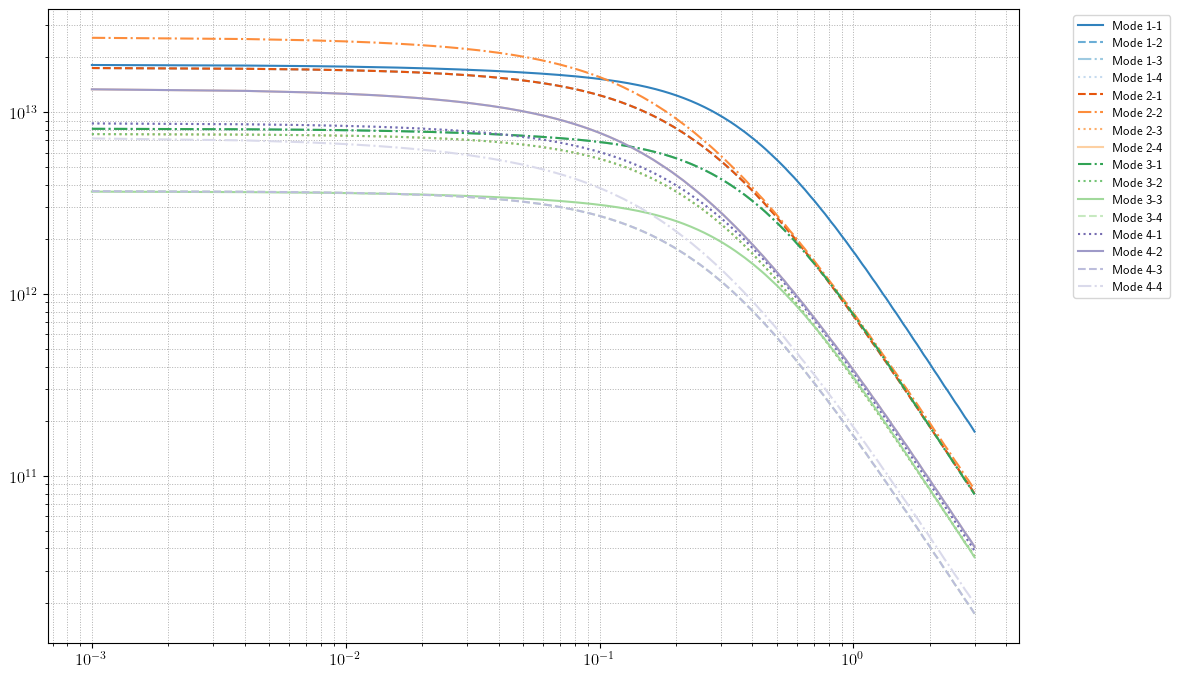

In [12]:
plt.figure(figsize=(12, 7))

colors = plt.cm.tab20c.colors  # 20 distinct colors
linestyles = ['-', '--', '-.', ':']

for k in range(4):
    for l in range(4):
        color = colors[(4 * k + l) % len(colors)]
        linestyle = linestyles[(k + l) % len(linestyles)]
        plt.plot(
            omega, SQ_5D[:, k, l],
            label=f"Mode {k+1}-{l+1}",
            color=color,
            linestyle=linestyle
        )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, ncol=1)
plt.grid(True, which='both', linestyle=':', linewidth=0.7)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()




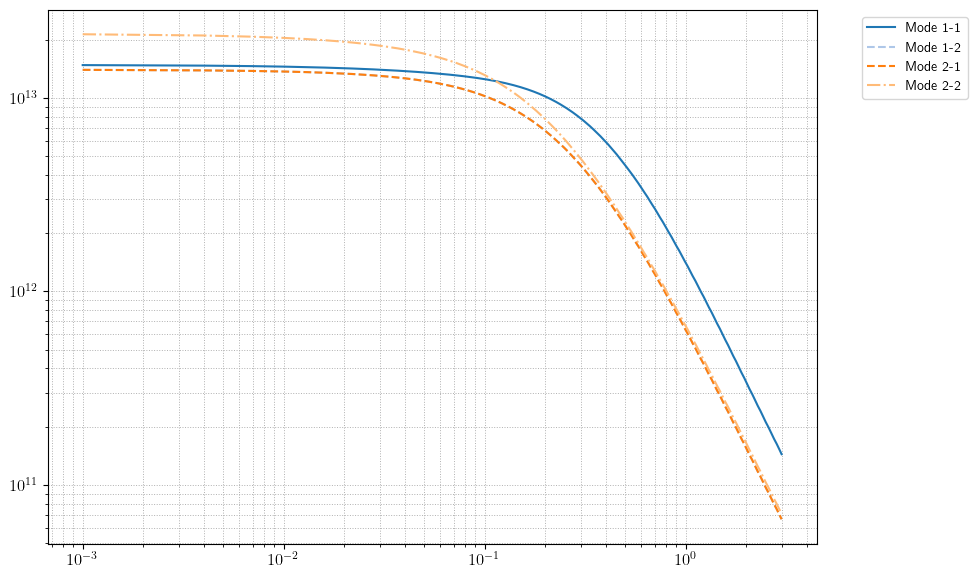

In [13]:
plt.figure(figsize=(10, 6))

colors = plt.cm.tab20.colors 
linestyles = ['-', '--', '-.', ':']

for k in range(2):
    for l in range(2):
        color = colors[(2 * k + l) % len(colors)]
        linestyle = linestyles[(k + l) % len(linestyles)]
        plt.plot(
            omega, SQ_Single[:, k, l],
            label=f"Mode {k+1}-{l+1}",
            color=color,
            linestyle=linestyle
        )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, which='both', linestyle=':', linewidth=0.7)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()


In [14]:
Cae_1D = (- rho * V * B / 2) * np.array([
    [CL_Upwind_1D[1] + (D/B)*CD_Upwind_1D[0], 0, CL_Upwind_1D[2], 0],
    [B*CM_Upwind_1D[1], 0, B*CM_Upwind_1D[2], 0],
    [CL_Downwind_1D[1], 0 , CL_Downwind_1D[2] + (D/B)*CD_Downwind_1D[0], 0],
    [B*CM_Downwind_1D[1], 0 , B*CM_Downwind_1D[2], 0]
])

Cae_2D = (- rho * V * B / 2) * np.array([
    [CL_Upwind_2D[1] + (D/B)*CD_Upwind_2D[0], 0, CL_Upwind_2D[2], 0],
    [B*CM_Upwind_2D[1], 0, B*CM_Upwind_2D[2], 0],
    [CL_Downwind_2D[1], 0 , CL_Downwind_2D[2] + (D/B)*CD_Downwind_2D[0], 0],
    [B*CM_Downwind_2D[1], 0 , B*CM_Downwind_2D[2], 0]
])

Cae_3D = (- rho * V * B / 2) * np.array([
    [CL_Upwind_3D[1] + (D/B)*CD_Upwind_3D[0], 0, CL_Upwind_3D[2], 0],
    [B*CM_Upwind_3D[1], 0, B*CM_Upwind_3D[2], 0],
    [CL_Downwind_3D[1], 0 , CL_Downwind_3D[2] + (D/B)*CD_Downwind_3D[0], 0],
    [B*CM_Downwind_3D[1], 0 , B*(CM_Downwind_3D[2]+0.0003), 0]
])

Cae_4D = (- rho * V * B / 2) * np.array([
    [CL_Upwind_4D[1] + (D/B)*CD_Upwind_4D[0], 0, CL_Upwind_4D[2], 0],
    [B*CM_Upwind_4D[1], 0, B*CM_Upwind_4D[2], 0],
    [CL_Downwind_4D[1], 0 , CL_Downwind_4D[2] + (D/B)*CD_Downwind_4D[0], 0],
    [B*CM_Downwind_4D[1], 0 , B*CM_Downwind_4D[2], 0]
])

Cae_5D = (- rho * V * B / 2) * np.array([
    [CL_Upwind_5D[1] + (D/B)*CD_Upwind_5D[0], 0, CL_Upwind_5D[2], 0],
    [B*CM_Upwind_5D[1], 0, B*CM_Upwind_5D[2], 0],
    [CL_Downwind_5D[1], 0 , CL_Downwind_5D[2] + (D/B)*CD_Downwind_5D[0], 0],
    [B*CM_Downwind_5D[1], 0 , B*CM_Downwind_5D[2], 0]
])

Cae_Single = (- rho * V * B / 2) * np.array([
    [CL_Single[1] + (D/B)*CD_Single[0], 0],
    [B*CM_Single[1], 0]
])

In [15]:
cae_1D = (- 1) * np.array([
    [CL_Upwind_1D[1] + (D/B)*CD_Upwind_1D[0], 0, CL_Upwind_1D[2], 0],
    [CM_Upwind_1D[1], 0, CM_Upwind_1D[2], 0],
    [CL_Downwind_1D[1], 0 , CL_Downwind_1D[2] + (D/B)*CD_Downwind_1D[0], 0],
    [CM_Downwind_1D[1], 0 , CM_Downwind_1D[2], 0]
])

cae_2D = (- 1) * np.array([
    [CL_Upwind_2D[1] + (D/B)*CD_Upwind_2D[0], 0, CL_Upwind_2D[2], 0],
    [CM_Upwind_2D[1], 0, CM_Upwind_2D[2], 0],
    [CL_Downwind_2D[1], 0 , CL_Downwind_2D[2] + (D/B)*CD_Downwind_2D[0], 0],
    [CM_Downwind_2D[1], 0 , CM_Downwind_2D[2], 0]
])

cae_3D = (- 1) * np.array([
    [CL_Upwind_3D[1] + (D/B)*CD_Upwind_3D[0], 0, CL_Upwind_3D[2], 0],
    [CM_Upwind_3D[1], 0, CM_Upwind_3D[2], 0],
    [CL_Downwind_3D[1], 0 , CL_Downwind_3D[2] + (D/B)*CD_Downwind_3D[0], 0],
    [CM_Downwind_3D[1], 0 , CM_Downwind_3D[2], 0]
])

cae_4D = (- 1) * np.array([
    [CL_Upwind_4D[1] + (D/B)*CD_Upwind_4D[0], 0, CL_Upwind_4D[2], 0],
    [CM_Upwind_4D[1], 0, CM_Upwind_4D[2], 0],
    [CL_Downwind_4D[1], 0 , CL_Downwind_4D[2] + (D/B)*CD_Downwind_4D[0], 0],
    [CM_Downwind_4D[1], 0 , CM_Downwind_4D[2], 0]
])

cae_5D = (- 1) * np.array([
    [CL_Upwind_5D[1] + (D/B)*CD_Upwind_5D[0], 0, CL_Upwind_5D[2], 0],
    [CM_Upwind_5D[1], 0, CM_Upwind_5D[2], 0],
    [CL_Downwind_5D[1], 0 , CL_Downwind_5D[2] + (D/B)*CD_Downwind_5D[0], 0],
    [CM_Downwind_5D[1], 0 , CM_Downwind_5D[2], 0]
])

cae_Single = (- 1) * np.array([
    [CL_Single[1] + (D/B)*CD_Single[0], 0],
    [CM_Single[1], 0]
])

In [16]:
Kae_1D = (rho * V**2 * B / 2) * np.array([
    [0, CL_Upwind_1D[1], 0, CL_Upwind_1D[2]],
    [0, B*CM_Upwind_1D[1], 0, B*CM_Upwind_1D[2]],
    [0, CL_Downwind_1D[1], 0, CL_Downwind_1D[2]],
    [0, B*CM_Downwind_1D[1], 0, B*CM_Downwind_1D[2]]
])

Kae_2D = (rho * V**2 * B / 2) * np.array([
    [0, CL_Upwind_2D[1], 0, CL_Upwind_2D[2]],
    [0, B*CM_Upwind_2D[1], 0, B*CM_Upwind_2D[2]],
    [0, CL_Downwind_2D[1], 0, CL_Downwind_2D[2]],
    [0, B*CM_Downwind_2D[1], 0, B*CM_Downwind_2D[2]]
])

Kae_3D = (rho * V**2 * B / 2) * np.array([
    [0, CL_Upwind_3D[1], 0, CL_Upwind_3D[2]],
    [0, B*CM_Upwind_3D[1], 0, B*CM_Upwind_3D[2]],
    [0, CL_Downwind_3D[1], 0, CL_Downwind_3D[2]],
    [0, B*CM_Downwind_3D[1], 0, B*(CM_Downwind_3D[2]+0.0003)]
])

Kae_4D = (rho * V**2 * B / 2) * np.array([
    [0, CL_Upwind_4D[1], 0, CL_Upwind_4D[2]],
    [0, B*CM_Upwind_4D[1], 0, B*CM_Upwind_4D[2]],
    [0, CL_Downwind_4D[1], 0, CL_Downwind_4D[2]],
    [0, B*CM_Downwind_4D[1], 0, B*CM_Downwind_4D[2]]
])

Kae_5D = (rho * V**2 * B / 2) * np.array([
    [0, CL_Upwind_5D[1], 0, CL_Upwind_5D[2]],
    [0, B*CM_Upwind_5D[1], 0, B*CM_Upwind_5D[2]],
    [0, CL_Downwind_5D[1], 0, CL_Downwind_5D[2]],
    [0, B*CM_Downwind_5D[1], 0, B*CM_Downwind_5D[2]]
])

Kae_Single = (rho * V**2 * B / 2) * np.array([
    [0, CL_Single[1]],
    [0, B*CM_Single[1]]
])

In [17]:
kae_1D = np.array([
    [0, CL_Upwind_1D[1], 0, CL_Upwind_1D[2]],
    [0, CM_Upwind_1D[1], 0, CM_Upwind_1D[2]],
    [0, CL_Downwind_1D[1], 0, CL_Downwind_1D[2]],
    [0, CM_Downwind_1D[1], 0, CM_Downwind_1D[2]]
])

kae_2D = np.array([
    [0, CL_Upwind_2D[1], 0, CL_Upwind_2D[2]],
    [0, CM_Upwind_2D[1], 0, CM_Upwind_2D[2]],
    [0, CL_Downwind_2D[1], 0, CL_Downwind_2D[2]],
    [0, CM_Downwind_2D[1], 0, CM_Downwind_2D[2]]
])

kae_3D = np.array([
    [0, CL_Upwind_3D[1], 0, CL_Upwind_3D[2]],
    [0, CM_Upwind_3D[1], 0, CM_Upwind_3D[2]],
    [0, CL_Downwind_3D[1], 0, CL_Downwind_3D[2]],
    [0, CM_Downwind_3D[1], 0, CM_Downwind_3D[2]]
])

kae_4D = np.array([
    [0, CL_Upwind_4D[1], 0, CL_Upwind_4D[2]],
    [0, CM_Upwind_4D[1], 0, CM_Upwind_4D[2]],
    [0, CL_Downwind_4D[1], 0, CL_Downwind_4D[2]],
    [0, CM_Downwind_4D[1], 0, CM_Downwind_4D[2]]
])

kae_5D = np.array([
    [0, CL_Upwind_5D[1], 0, CL_Upwind_5D[2]],
    [0, CM_Upwind_5D[1], 0, CM_Upwind_5D[2]],
    [0, CL_Downwind_5D[1], 0, CL_Downwind_5D[2]],
    [0, CM_Downwind_5D[1], 0, CM_Downwind_5D[2]]
])

kae_Single = np.array([
    [0, CL_Single[1]],
    [0, CM_Single[1]]
])

In [18]:
#Modal masses
m4 = 4440740 #kg
m15 = 5628460 #kg

#Natural frequencies
f4 = 0.14066 #Hz
f15 = 0.35969 #Hz

#Modal damping ratios
zeta = 0.005 

#Modal mass matrix
mass = np.array([m4, m15, m4, m15])
M = np.diag(mass)
mass_single = np.array([m4, m15])
M_single = np.diag(mass_single)

#Modal stiffness matrix
stiffness = np.array([m4 * (2 * np.pi * f4)**2, m15 * (2 * np.pi * f15)**2, m4 * (2 * np.pi * f4)**2, m15 * (2 * np.pi * f15)**2])
K = np.diag(stiffness)
stiffness_single = np.array([m4 * (2 * np.pi * f4)**2, m15 * (2 * np.pi * f15)**2])
K_single = np.diag(stiffness_single)

#Modal damping matrix
C = 2 * zeta * np.sqrt(np.dot(M, K))
C_single = 2 * zeta * np.sqrt(np.dot(M_single, K_single))

In [19]:
#Generalizing the aerodynamic stiffness and damping matrices
dx = np.zeros_like(x_4)
dx[1:-1] = (x_4[2:] - x_4[:-2]) / 2
dx[0] = (x_4[1] - x_4[0]) / 2
dx[-1] = (x_4[-1] - x_4[-2]) / 2

def generalize_matrix(matrix, dx, phi):
    blocks = [matrix * c for c in dx]
    matrix_global = block_diag(*blocks)
    matrix_gen = phi.T @ matrix_global @ phi
    return matrix_gen

Kae_1D_gen = generalize_matrix(Kae_1D, dx, phi)
Kae_2D_gen = generalize_matrix(Kae_2D, dx, phi)
Kae_3D_gen = generalize_matrix(Kae_3D, dx, phi)
Kae_4D_gen = generalize_matrix(Kae_4D, dx, phi)
Kae_5D_gen = generalize_matrix(Kae_5D, dx, phi)
Kae_Single_gen = generalize_matrix(Kae_Single, dx, phi_single)

Cae_1D_gen = generalize_matrix(Cae_1D, dx, phi)
Cae_2D_gen = generalize_matrix(Cae_2D, dx, phi)
Cae_3D_gen = generalize_matrix(Cae_3D, dx, phi)
Cae_4D_gen = generalize_matrix(Cae_4D, dx, phi)
Cae_5D_gen = generalize_matrix(Cae_5D, dx, phi)
Cae_Single_gen = generalize_matrix(Cae_Single, dx, phi_single)

In [20]:
# Create a dictionary of all matrices
matrices = {
    "Kae_1D": Kae_1D_gen /V**2,
    "Kae_2D": Kae_2D_gen /V**2,
    "Kae_3D": Kae_3D_gen /V**2,
    "Kae_4D": Kae_4D_gen /V**2,
    "Kae_5D": Kae_5D_gen /V**2,
    "Kae_Single": Kae_Single_gen /V**2,
    "Cae_1D": Cae_1D_gen /V,
    "Cae_2D": Cae_2D_gen /V,
    "Cae_3D": Cae_3D_gen /V,
    "Cae_4D": Cae_4D_gen /V,
    "Cae_5D": Cae_5D_gen /V,
    "Cae_Single": Cae_Single_gen /V
}


matrices_asAD = {
    "Kae_1D": kae_1D,
    "Kae_2D": kae_2D,
    "Kae_3D": kae_3D,
    "Kae_4D": kae_4D,
    "Kae_5D": kae_5D,
    "Kae_Single": kae_Single,
    "Cae_1D": cae_1D,
    "Cae_2D": cae_2D,
    "Cae_3D": cae_3D,
    "Cae_4D": cae_4D,
    "Cae_5D": cae_5D,
    "Cae_Single": cae_Single
}


# Specify path
save_path = r'C:\Users\alasm\Masteroppgave\HAR_INT\Buffeting/Cae_Kae_QS.npy'

# Save the dictionary
#np.save(save_path, matrices)

In [21]:
#Frequency response function
H_1D = []
H_2D = []
H_3D = []
H_4D = []
H_5D = []
H_Single = []

for w in omega:
    h_1D = np.linalg.inv(-w**2 * M + 1j * w * (C - Cae_1D_gen) + (K - Kae_1D_gen))
    H_1D.append(h_1D)
    h_2D = np.linalg.inv(-w**2 * M + 1j * w * (C - Cae_2D_gen) + (K - Kae_2D_gen))
    H_2D.append(h_2D)
    h_3D = np.linalg.inv(-w**2 * M + 1j * w * (C - Cae_3D_gen) + (K - Kae_3D_gen))
    H_3D.append(h_3D)
    h_4D = np.linalg.inv(-w**2 * M + 1j * w * (C - Cae_4D_gen) + (K - Kae_4D_gen))
    H_4D.append(h_4D)
    h_5D = np.linalg.inv(-w**2 * M + 1j * w * (C - Cae_5D_gen) + (K - Kae_5D_gen))
    H_5D.append(h_5D)
    h_single = np.linalg.inv(-w**2 * M_single + 1j * w * (C_single - Cae_Single_gen) + (K_single - Kae_Single_gen))
    H_Single.append(h_single)

H_1D = np.array(H_1D)
H_2D = np.array(H_2D)
H_3D = np.array(H_3D)
H_4D = np.array(H_4D)
H_5D = np.array(H_5D)
H_Single = np.array(H_Single)

H_1D_her = np.transpose(np.conjugate(H_1D), axes=(0, 2, 1))
H_2D_her = np.transpose(np.conjugate(H_2D), axes=(0, 2, 1))
H_3D_her = np.transpose(np.conjugate(H_3D), axes=(0, 2, 1))
H_4D_her = np.transpose(np.conjugate(H_4D), axes=(0, 2, 1))
H_5D_her = np.transpose(np.conjugate(H_5D), axes=(0, 2, 1))
H_Single_her = np.transpose(np.conjugate(H_Single), axes=(0, 2, 1))

In [22]:
#Response spectra
S_eta_1D = H_1D @ SQ_1D @ H_1D_her
S_eta_2D = H_2D @ SQ_2D @ H_2D_her
S_eta_3D = H_3D @ SQ_3D @ H_3D_her
S_eta_4D = H_4D @ SQ_4D @ H_4D_her
S_eta_5D = H_5D @ SQ_5D @ H_5D_her
S_eta_Single = H_Single @ SQ_Single @ H_Single_her

S_r_1D = phi @ S_eta_1D @ phi.T
S_r_2D = phi @ S_eta_2D @ phi.T
S_r_3D = phi @ S_eta_3D @ phi.T
S_r_4D = phi @ S_eta_4D @ phi.T
S_r_5D = phi @ S_eta_5D @ phi.T
S_r_Single = phi_single @ S_eta_Single @ phi_single.T


In [23]:
S_r_1D_auto = np.array([np.diag(S_r_1D[i]) for i in range(1000)])
S_r_2D_auto = np.array([np.diag(S_r_2D[i]) for i in range(1000)])
S_r_3D_auto = np.array([np.diag(S_r_3D[i]) for i in range(1000)])
S_r_4D_auto = np.array([np.diag(S_r_4D[i]) for i in range(1000)])
S_r_5D_auto = np.array([np.diag(S_r_5D[i]) for i in range(1000)])
S_r_Single_auto = np.array([np.diag(S_r_Single[i]) for i in range(1000)])

In [24]:
S_r_1D_z1 = S_r_1D_auto[:, 0::4]
S_r_1D_theta1 = S_r_1D_auto[:, 1::4]
S_r_1D_z2 = S_r_1D_auto[:, 2::4]
S_r_1D_theta2 = S_r_1D_auto[:, 3::4]

S_r_2D_z1 = S_r_2D_auto[:, 0::4]
S_r_2D_theta1 = S_r_2D_auto[:, 1::4]
S_r_2D_z2 = S_r_2D_auto[:, 2::4]
S_r_2D_theta2 = S_r_2D_auto[:, 3::4]

S_r_3D_z1 = S_r_3D_auto[:, 0::4]
S_r_3D_theta1 = S_r_3D_auto[:, 1::4]
S_r_3D_z2 = S_r_3D_auto[:, 2::4]
S_r_3D_theta2 = S_r_3D_auto[:, 3::4]

S_r_4D_z1 = S_r_4D_auto[:, 0::4]
S_r_4D_theta1 = S_r_4D_auto[:, 1::4]
S_r_4D_z2 = S_r_4D_auto[:, 2::4]
S_r_4D_theta2 = S_r_4D_auto[:, 3::4]

S_r_5D_z1 = S_r_5D_auto[:, 0::4]
S_r_5D_theta1 = S_r_5D_auto[:, 1::4]
S_r_5D_z2 = S_r_5D_auto[:, 2::4]
S_r_5D_theta2 = S_r_5D_auto[:, 3::4]

S_r_Single_z1 = S_r_Single_auto[:, 0::2]
S_r_Single_theta1 = S_r_Single_auto[:, 1::2]


c:\Users\alasm\anacondany\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


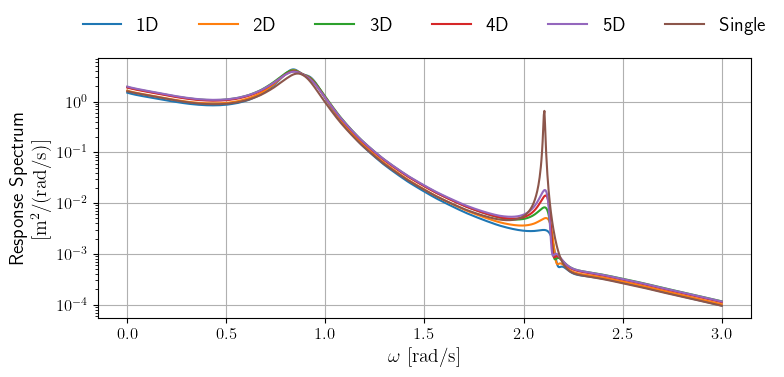

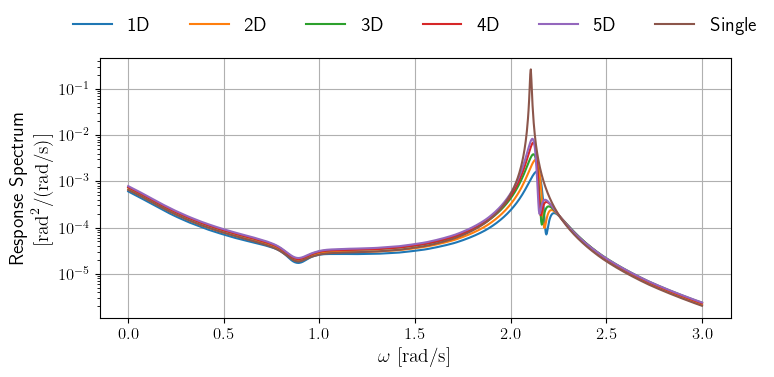

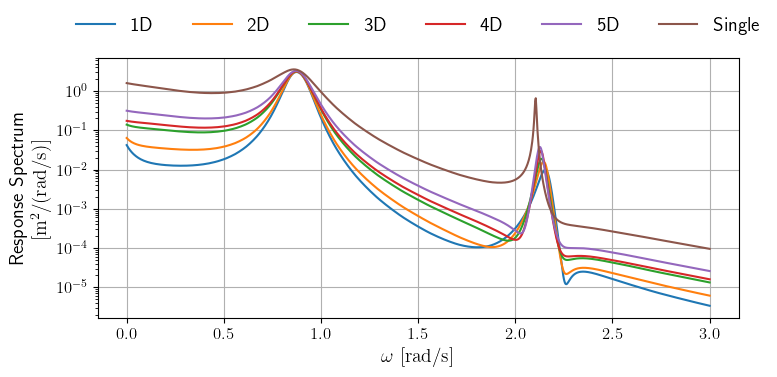

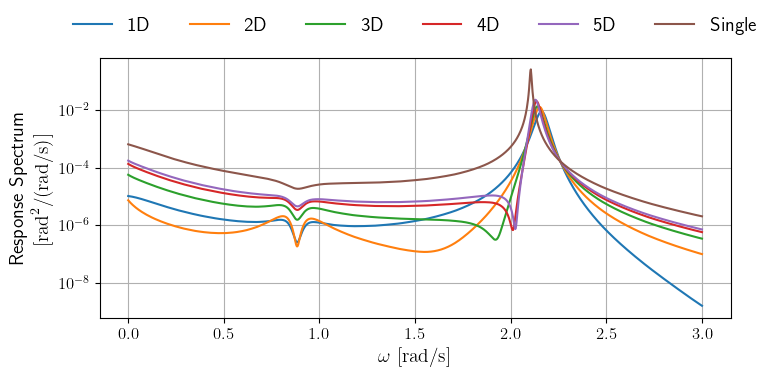

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(omega, S_r_1D_z1[:, 33], label="1D")
plt.plot(omega, S_r_2D_z1[:, 33], label="2D")
plt.plot(omega, S_r_3D_z1[:, 33], label="3D")
plt.plot(omega, S_r_4D_z1[:, 33], label="4D")
plt.plot(omega, S_r_5D_z1[:, 33], label="5D")
plt.plot(omega, S_r_Single_z1[:, 33], label="Single")
plt.xlabel(r"$\omega~[\mathrm{rad/s}]$")
plt.ylabel("Response Spectrum" "\n" r"$[\mathrm{m}^2/\mathrm{(rad/s)}]$")
#plt.title("Response Spectrum for vertical motion at midspan of upstream bridge")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=6, frameon=False)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.grid(True)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(0.87, 0.9)
plt.savefig("Response_Spectrum_Upstream_Bridge_Vertical_log.png")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(omega, S_r_1D_theta1[:, 33], label="1D")
plt.plot(omega, S_r_2D_theta1[:, 33], label="2D")
plt.plot(omega, S_r_3D_theta1[:, 33], label="3D")
plt.plot(omega, S_r_4D_theta1[:, 33], label="4D")
plt.plot(omega, S_r_5D_theta1[:, 33], label="5D")
plt.plot(omega, S_r_Single_theta1[:, 33], label="Single")
plt.xlabel(r"$\omega~[\mathrm{rad/s}]$")
plt.ylabel("Response Spectrum" "\n" r"$[\mathrm{rad}^2/\mathrm{(rad/s)}]$")
#plt.title("Response Spectrum for rotation at midspan of upstream bridge")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=6, frameon=False)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.grid(True)
#plt.xscale('log')
plt.yscale('log')
plt.savefig("Response_Spectrum_Upstream_Bridge_Rotation_log.png")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(omega, S_r_1D_z2[:, 33], label="1D")
plt.plot(omega, S_r_2D_z2[:, 33], label="2D")
plt.plot(omega, S_r_3D_z2[:, 33], label="3D")
plt.plot(omega, S_r_4D_z2[:, 33], label="4D")
plt.plot(omega, S_r_5D_z2[:, 33], label="5D")
plt.plot(omega, S_r_Single_z1[:, 33], label="Single")
plt.xlabel(r"$\omega~[\mathrm{rad/s}]$")
plt.ylabel("Response Spectrum" "\n" r"$[\mathrm{m}^2/\mathrm{(rad/s)}]$")
#plt.title("Response Spectrum for vertical motion at midspan of downstream bridge")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=6, frameon=False)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.grid(True)  
#plt.xscale('log')
plt.yscale('log')
plt.savefig("Response_Spectrum_Downstream_Bridge_Vertical_log.png")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(omega, S_r_1D_theta2[:, 33], label="1D")
plt.plot(omega, S_r_2D_theta2[:, 33], label="2D")
plt.plot(omega, S_r_3D_theta2[:, 33], label="3D")
plt.plot(omega, S_r_4D_theta2[:, 33], label="4D")
plt.plot(omega, S_r_5D_theta2[:, 33], label="5D")
plt.plot(omega, S_r_Single_theta1[:, 33], label="Single")
plt.xlabel(r"$\omega~[\mathrm{rad/s}]$")
plt.ylabel("Response Spectrum" "\n" r"$[\mathrm{rad}^2/\mathrm{(rad/s)}]$")
#plt.title("Response Spectrum for rotation at midspan of downstream bridge")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=6, frameon=False)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.grid(True)  
#plt.xscale('log')
plt.yscale('log')
plt.savefig("Response_Spectrum_Downstream_Bridge_Rotation_log.png")
plt.show()


In [26]:
def print_std_metrics(label, *spectra):
    print(f"\n--- {label} ---")
    configs = ["1D", "2D", "3D", "4D", "5D", "Single"]
    for name, S in zip(configs, spectra):
        std_lin = np.std(S[:, 33])
        std_log = np.std(np.log10(S[:, 33]))
        print(f"{name:<6} | Std: {std_lin:.3e} | Log-Std: {std_log:.3f}")

# Upstream bridge - vertical motion
print_std_metrics("Upstream Vertical",
    S_r_1D_z1, S_r_2D_z1, S_r_3D_z1, S_r_4D_z1, S_r_5D_z1, S_r_Single_z1
)

# Upstream bridge - rotation
print_std_metrics("Upstream Rotation",
    S_r_1D_theta1, S_r_2D_theta1, S_r_3D_theta1, S_r_4D_theta1, S_r_5D_theta1, S_r_Single_theta1
)

# Downstream bridge - vertical motion
print_std_metrics("Downstream Vertical",
    S_r_1D_z2, S_r_2D_z2, S_r_3D_z2, S_r_4D_z2, S_r_5D_z2, S_r_Single_z1
)

# Downstream bridge - rotation
print_std_metrics("Downstream Rotation",
    S_r_1D_theta2, S_r_2D_theta2, S_r_3D_theta2, S_r_4D_theta2, S_r_5D_theta2, S_r_Single_theta1
)



--- Upstream Vertical ---
1D     | Std: 9.313e-01 | Log-Std: 1.560
2D     | Std: 9.340e-01 | Log-Std: 1.554
3D     | Std: 9.767e-01 | Log-Std: 1.547
4D     | Std: 9.453e-01 | Log-Std: 1.544
5D     | Std: 9.470e-01 | Log-Std: 1.541
Single | Std: 8.179e-01 | Log-Std: 1.537

--- Upstream Rotation ---
1D     | Std: 2.255e-04 | Log-Std: 0.591
2D     | Std: 3.611e-04 | Log-Std: 0.615
3D     | Std: 4.581e-04 | Log-Std: 0.628
4D     | Std: 7.299e-04 | Log-Std: 0.650
5D     | Std: 8.558e-04 | Log-Std: 0.656
Single | Std: 1.279e-02 | Log-Std: 0.742

--- Downstream Vertical ---
1D     | Std: 4.868e-01 | Log-Std: 1.609
2D     | Std: 4.981e-01 | Log-Std: 1.618
3D     | Std: 5.318e-01 | Log-Std: 1.608
4D     | Std: 5.355e-01 | Log-Std: 1.609
5D     | Std: 5.686e-01 | Log-Std: 1.590
Single | Std: 8.179e-01 | Log-Std: 1.537

--- Downstream Rotation ---
1D     | Std: 1.041e-03 | Log-Std: 1.228
2D     | Std: 1.399e-03 | Log-Std: 1.060
3D     | Std: 1.431e-03 | Log-Std: 0.867
4D     | Std: 1.931e-03 | L